# Regression Visualization with Seaborn in Python

## Imports

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [182]:
# Importing some data
df = sns.load_dataset('car_crashes')
print(df.shape, '\n')
df.head(3)

(51, 8) 



,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


## Correlations

In [57]:
(df
 .drop(['abbrev'], axis=1)
 .corr()
 .style
 .background_gradient(cmap='coolwarm')
 )

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


## Linear Regression

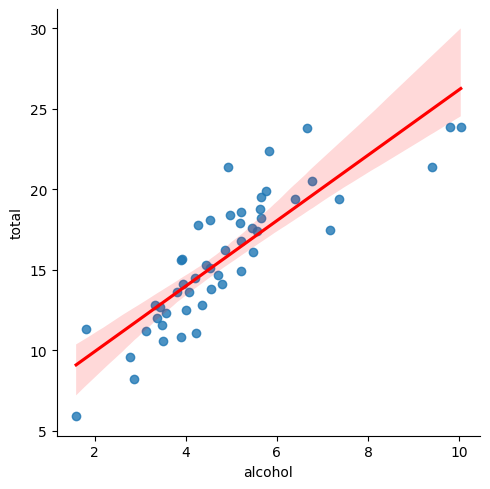

In [70]:
# Linear model Viz
sns.lmplot(x='alcohol', y='total',
           robust=False,
           line_kws={"color": "red"}, data=df);

## Robust Linear Regression

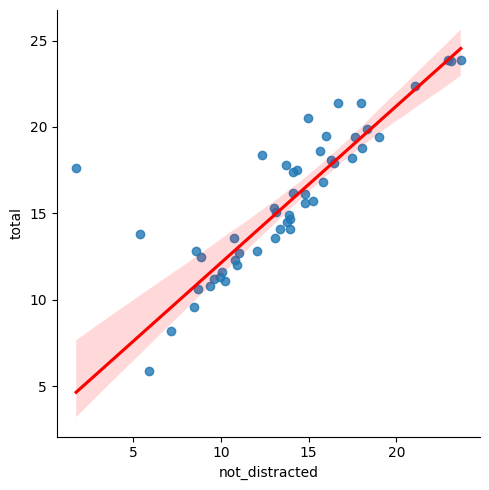

In [74]:
# Robust Linear model Viz
sns.lmplot(x='not_distracted', y='total',
           robust=True,
           line_kws={"color": "red"}, data=df);

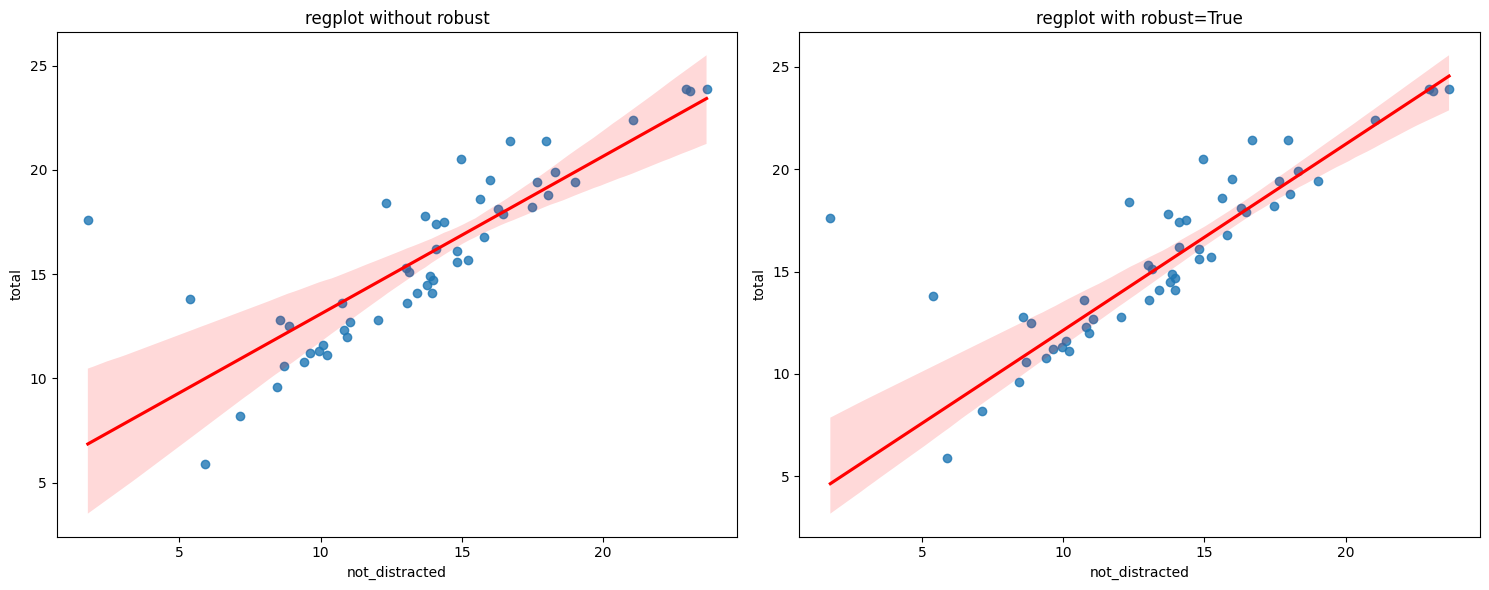

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Use regplot instead of lmplot for axes-level plotting
sns.regplot(x='not_distracted', y='total', line_kws={'color':'red'}, data=df, ax=axes[0]);
axes[0].set_title('regplot without robust')

# Use regplot instead of lmplot for axes-level plotting
sns.regplot(x='not_distracted', y='total',  line_kws={'color':'red'}, data=df, robust=True, ax=axes[1]);
axes[1].set_title('regplot with robust=True')

plt.tight_layout()
plt.show()

## Polynomial

In [135]:
# prompt: create a dataset with polynomial order 3 with 300 observations, 2 variables

import numpy as np
import pandas as pd

# Set a seed for reproducibility
np.random.seed(0)

# Number of observations and variables
n_observations = 300
n_variables = 1

# Generate random data
X = np.random.rand(n_observations, n_variables).flatten()

# Create a target variable (y) with a polynomial relationship to X
y = 2*X**3 - X**2 + 0.5*X * X + np.random.randn(n_observations)

# Create a Pandas DataFrame
df = pd.DataFrame({'X': X, 'y': y.flatten()})

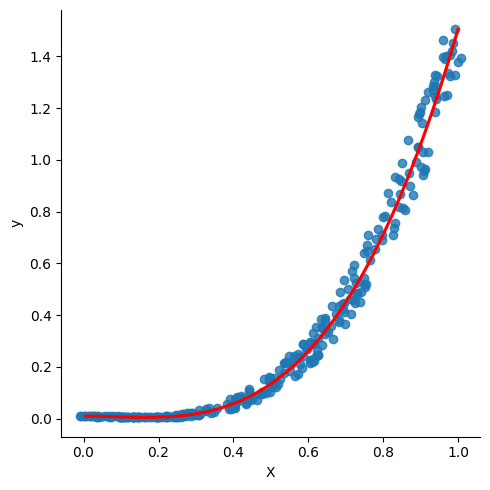

In [148]:
# Polynomial Linear Model
sns.lmplot(data=df,
           x='X', y='y',
           order=3,
           line_kws={'color':'red'},
           x_jitter=0.04);

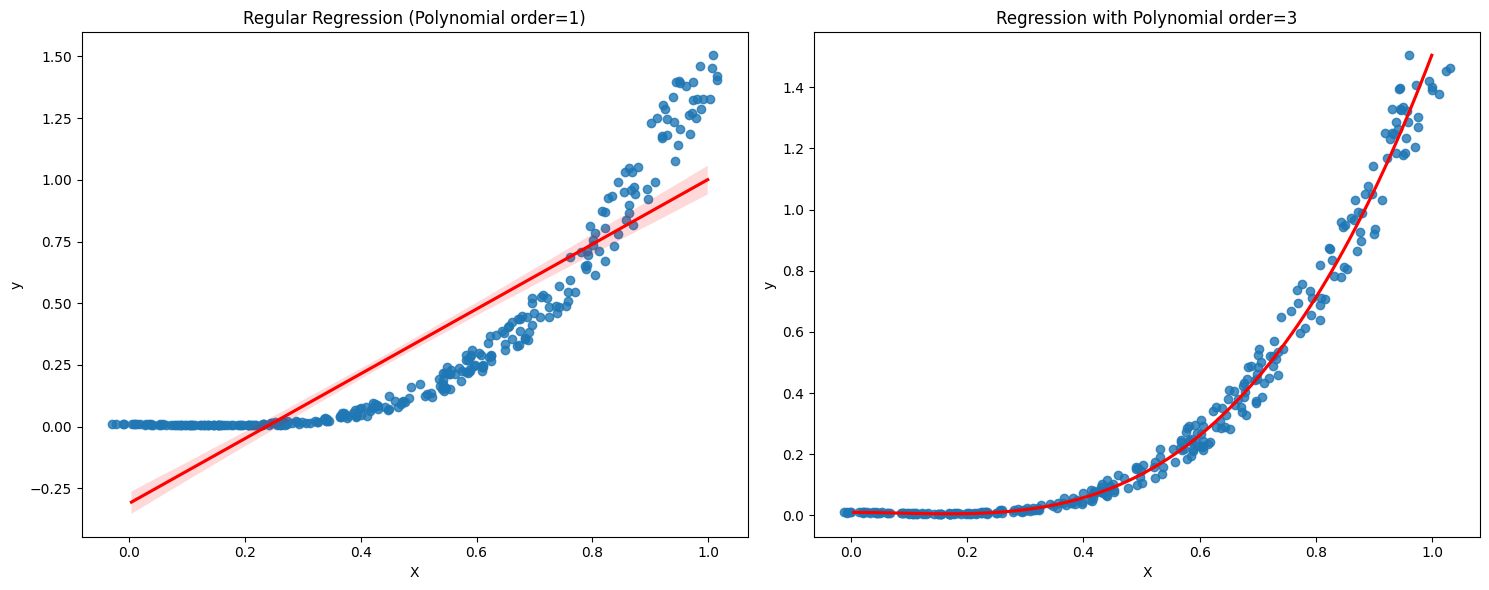

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Use regplot instead of lmplot for axes-level plotting
sns.regplot(x='X', y='y', line_kws={'color':'red'}, data=df, x_jitter=0.04, ax=axes[0]);
axes[0].set_title('Regular Regression (Polynomial order=1)')

# Use regplot instead of lmplot for axes-level plotting
sns.regplot(x='X', y='y',  line_kws={'color':'red'}, order=3, data=df, x_jitter=0.04, ax=axes[1]);
axes[1].set_title('Regression with Polynomial order=3')

plt.tight_layout()
plt.show()

## Logistic Regression

In [172]:
# Load data
df = sns.load_dataset('exercise', index_col='Unnamed: 0')
df['diet'] = df.diet.map({'low fat': 1, 'no fat': 0})
df['time'] = df['time'].map({'1 min':1, '15 min':15, '30 min':30}).astype('int')
df.sample(3)

,id,diet,pulse,time,kind
46,16,0,86,15,walking
68,23,1,99,30,running
53,18,0,101,30,walking


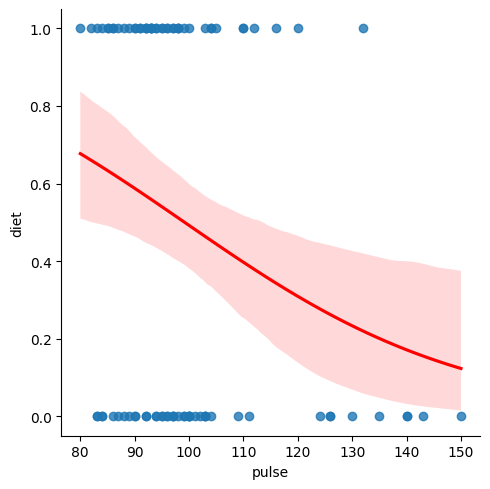

In [174]:
# Logistic Regression lmplot
sns.lmplot(data=df,
           x='pulse', y='diet',
           logistic=True,
           line_kws={'color':'red'});

## Lowess Smoother

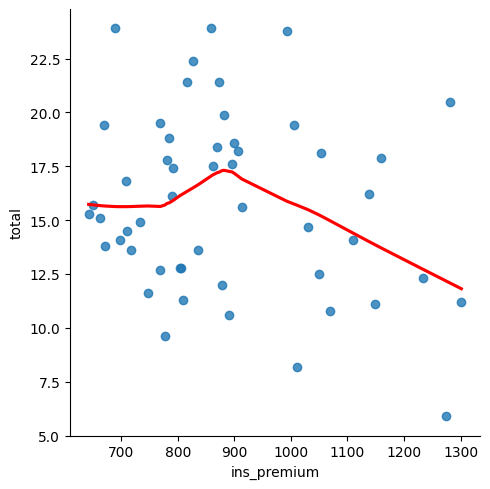

In [189]:
# Lowess smoother
sns.lmplot(data=df,
           x="ins_premium", y="total",
           lowess=True,
           line_kws={'color':'red'});

## Residual Plot

<Axes: xlabel='alcohol', ylabel='total'>

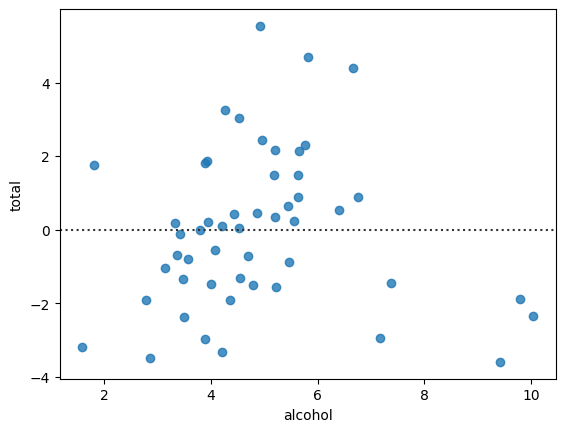

In [193]:
#Residual plot
sns.residplot(data=df,
              x="alcohol", y="total")

## Regression by group

In [194]:
# Load data
df = sns.load_dataset('tips')
df.sample(3)

,total_bill,tip,sex,smoker,day,time,size
200,18.71,4.0,Male,Yes,Thur,Lunch,3
183,23.17,6.5,Male,Yes,Sun,Dinner,4
141,34.30,6.7,Male,No,Thur,Lunch,6


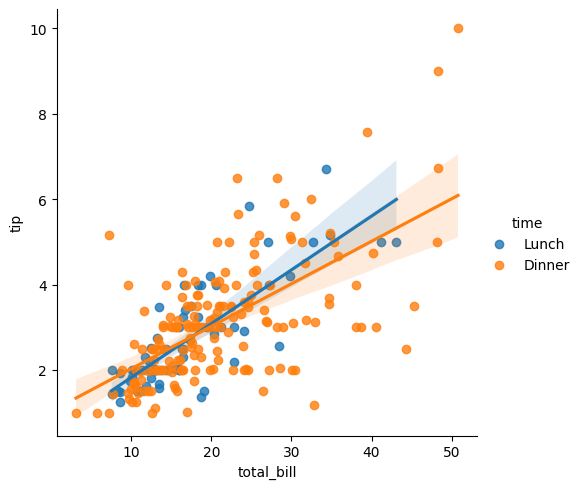

In [199]:
# Regression of Tips by hue=size
sns.lmplot(data=df,
           x='total_bill', y='tip',
           hue='time'  );

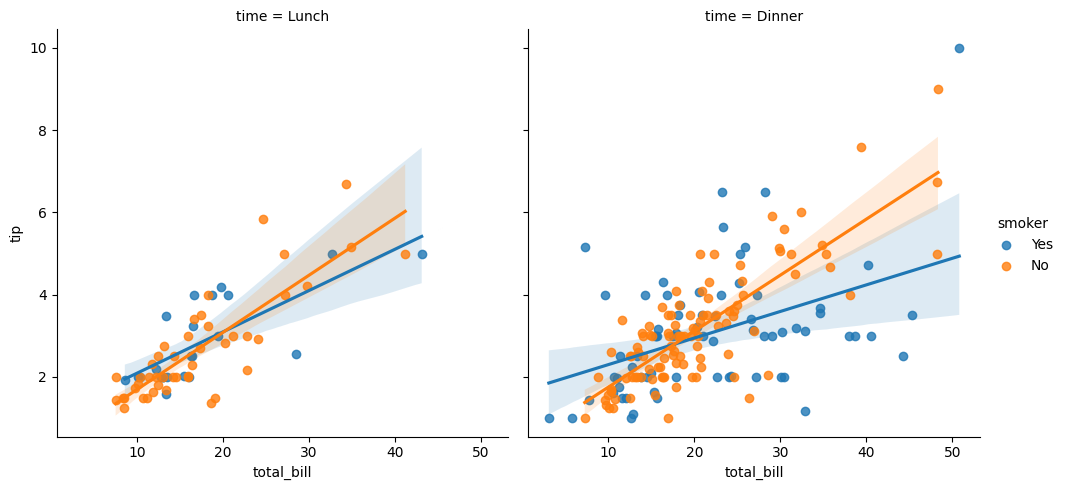

In [201]:
# Split by column
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=df);

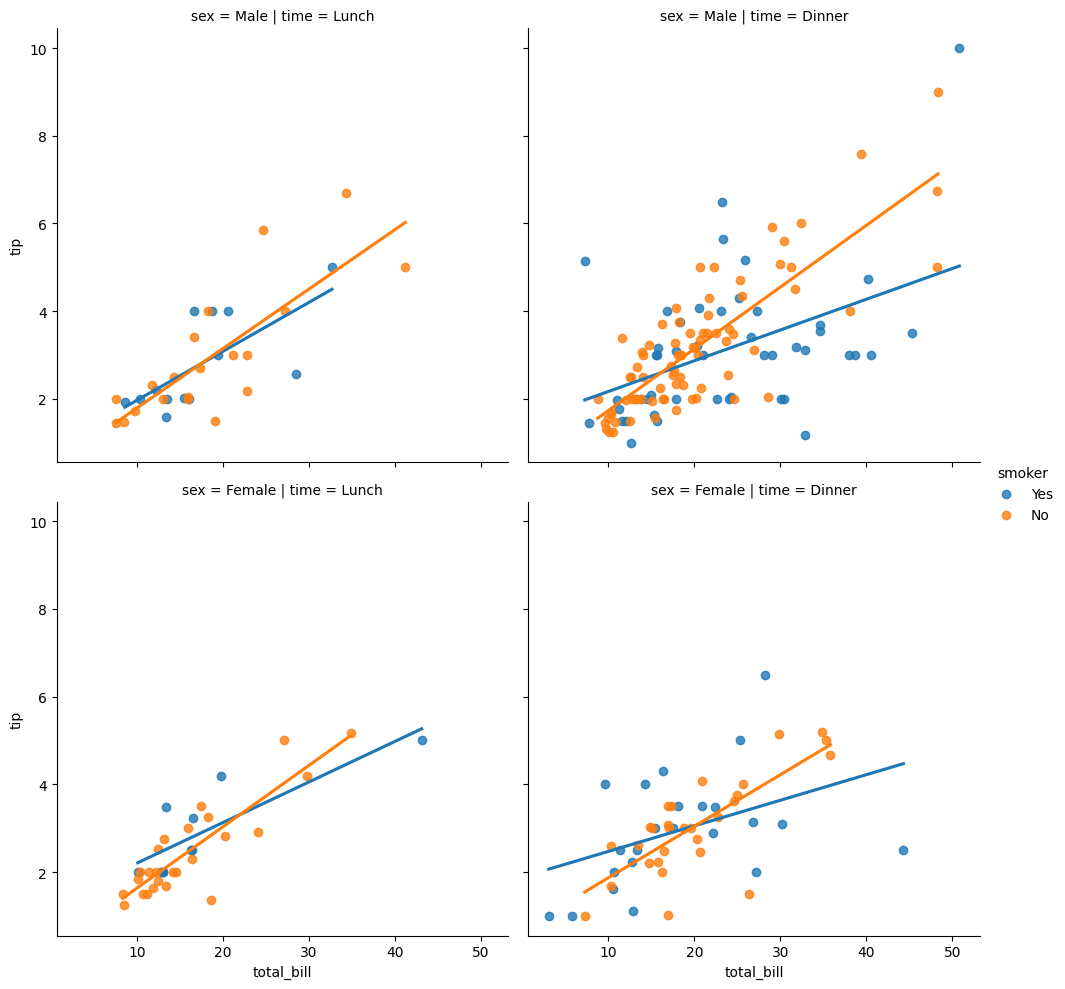

In [209]:
# Split by rows and columns
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=df, ci=None);